# Regression



In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('data/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Explore the data

In [23]:
print(df.shape)

(414, 8)


**This is a medium dataset. With Just 414 instances.**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [25]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


**Note: count variable suggest no missing data**

In [26]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


**Note: There is a higher correlation between the X4 number of convenience stores and Y house price of unit area**

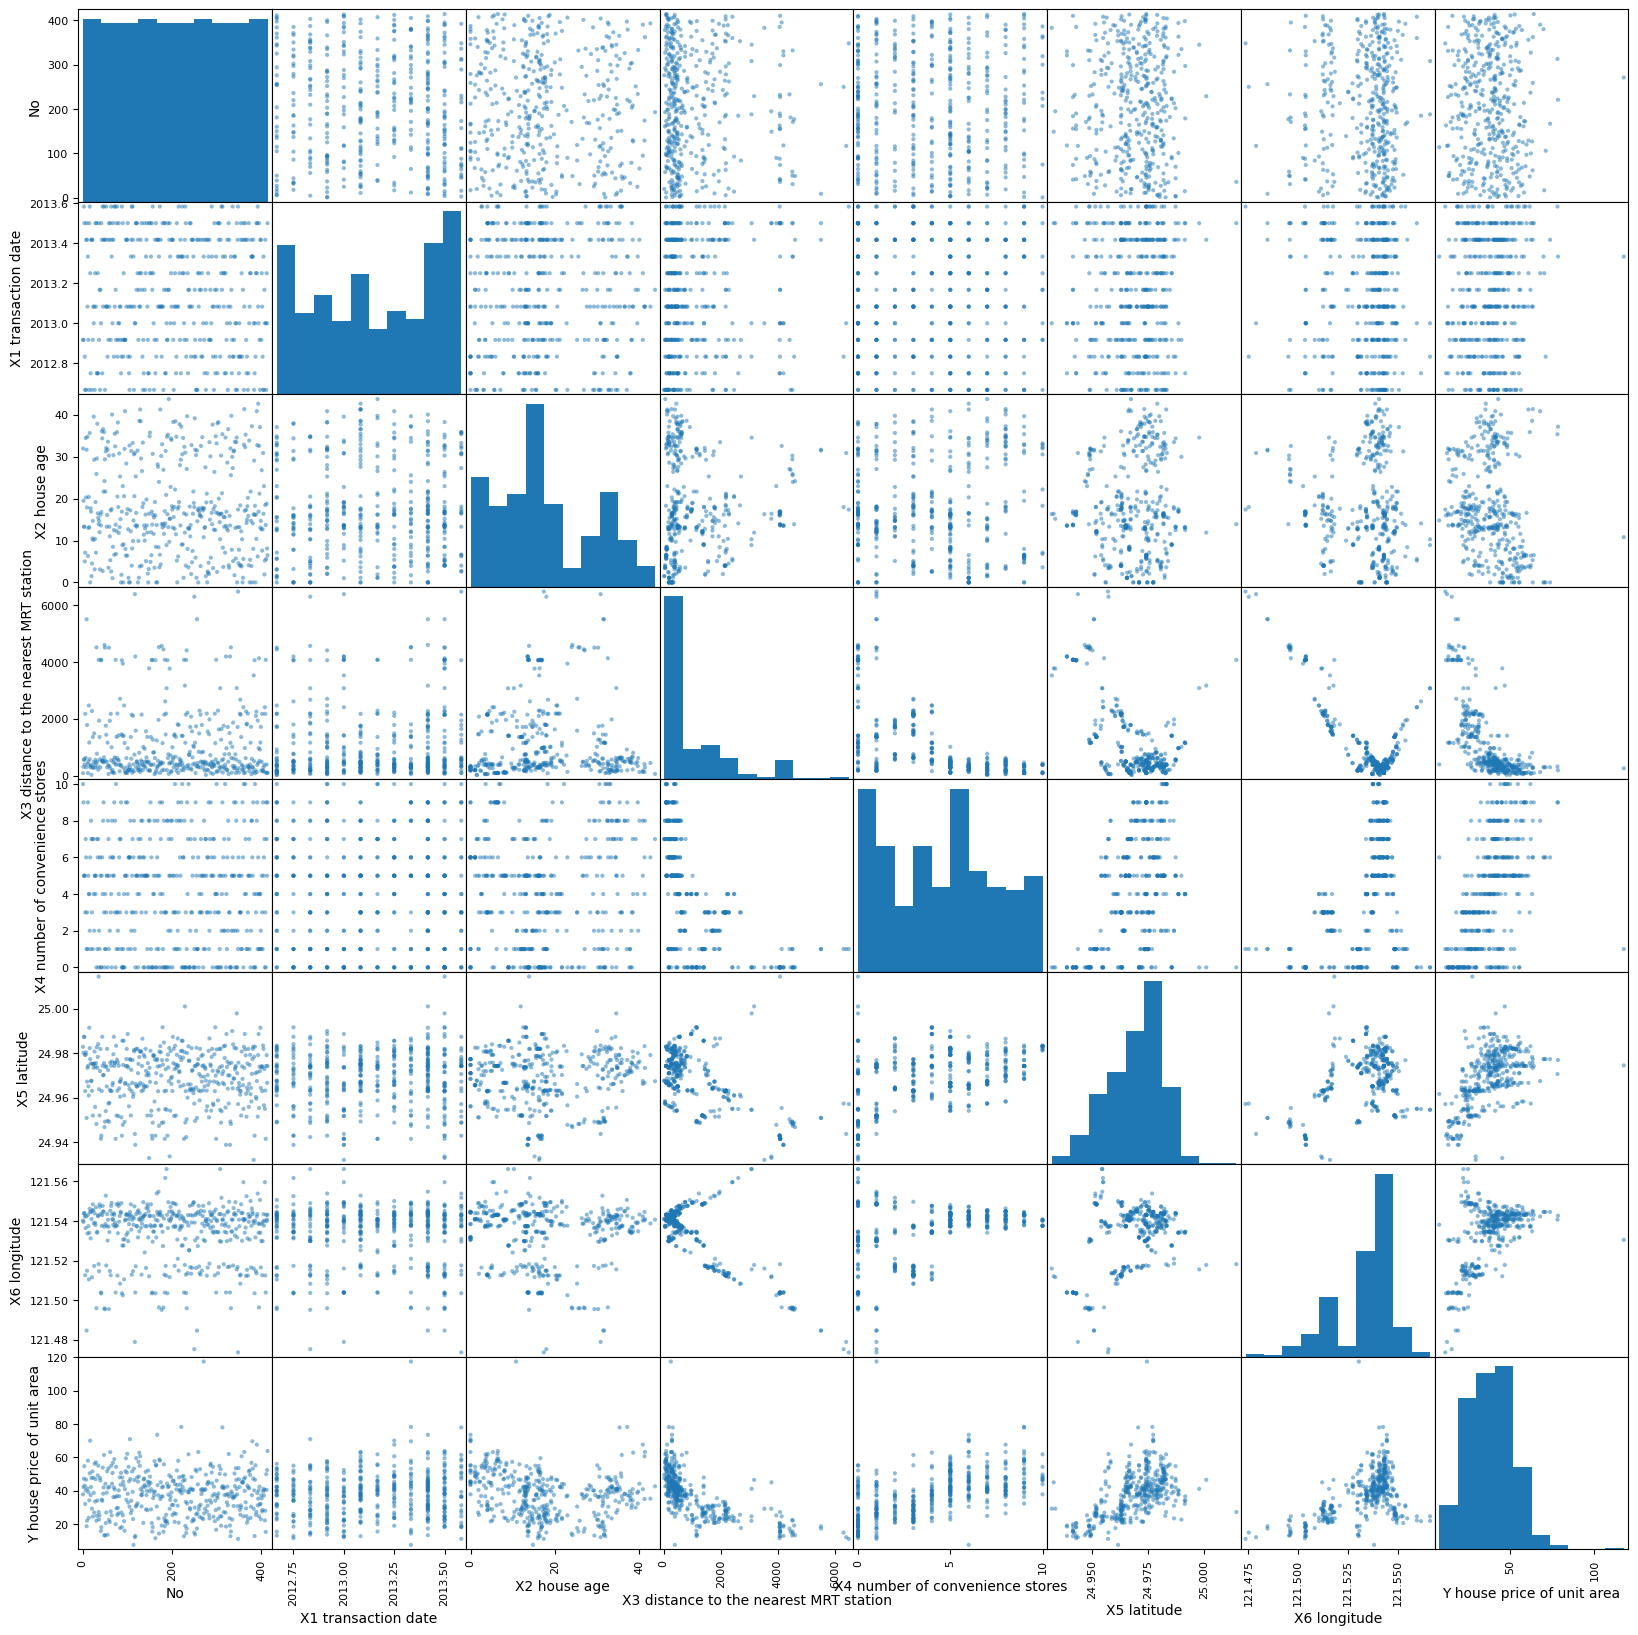

In [27]:
scatter_matrix(df, figsize=(20,20))
plt.savefig('plots/scatter_matrix_of_linear_reg.png')
plt.show()

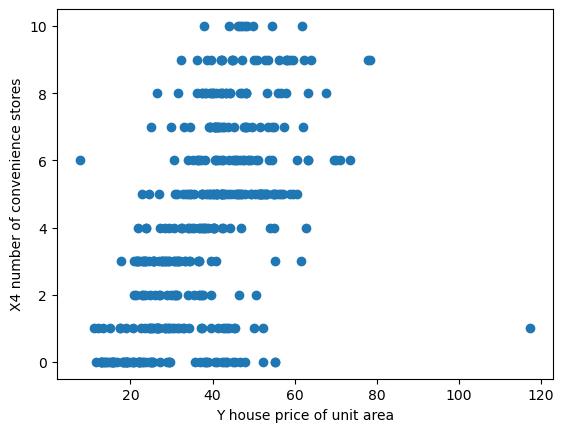

In [28]:
# Lets have a 
plt.scatter(df['Y house price of unit area'],df['X4 number of convenience stores'])
plt.xlabel('Y house price of unit area')
plt.ylabel('X4 number of convenience stores')
plt.savefig('plots/scatter_plot_of_linear_reg.png')
plt.show()

### Build the model 

In [29]:
X = df.drop("Y house price of unit area", axis="columns")
y= df["Y house price of unit area"]

**Split into training and test data**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)
print(X_train.shape)
print(X_test.shape)

(310, 7)
(104, 7)


In [31]:
model= LinearRegression()
model.fit(X_train, y_train)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -13617.375242496239
slope: [-5.63803764e-03  4.17336678e+00 -2.77564381e-01 -4.42208985e-03
  1.22588817e+00  1.90206680e+02  4.19840382e+00]


## Model Evaluation 

In [32]:
print('R squared:', model.score(X_train, y_train))

R squared: 0.601385403155118


**Predictions on the test set**

In [33]:
# Predictions on the test set
yhat = model.predict(X_test)

**Find the Root Mean Square Error**

In [34]:
print(mean_squared_error(y_test, yhat, squared=False))

10.456418596451583


### Polynomial Regression

In [35]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [36]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

**Predictions on the test set with polynomial regression**

In [37]:
y_pred_poly = poly_reg.predict(X_test_poly)

**Evaluate the models**

In [38]:
print("Linear Regression:")
print("Mean Squared Error: ", mean_squared_error(y_test, yhat))
print("R-sqaured:", r2_score(y_test,yhat))

print("\nPolynomial Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("R-squared:",r2_score(y_test,y_pred_poly))

Linear Regression:
Mean Squared Error:  109.3366898642185
R-sqaured: 0.5290103055830329

Polynomial Regression:
Mean Squared Error: 95.28723429953824
R-squared: 0.5895311498792258


**The Polynomial regression model suggests improved performance as it demonstrates a better fit to the data with a higher R-squared value and a lower MSE compared to linear regression.**

In [39]:
y_test.shape

(104,)

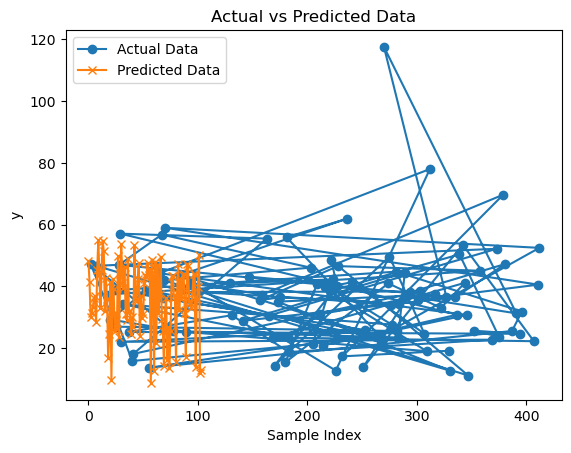

In [40]:
plt.plot(y_test, label='Actual Data', marker='o')
plt.plot(yhat, label='Predicted Data', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('y')
plt.title('Actual vs Predicted Data')
plt.legend()
plt.show()

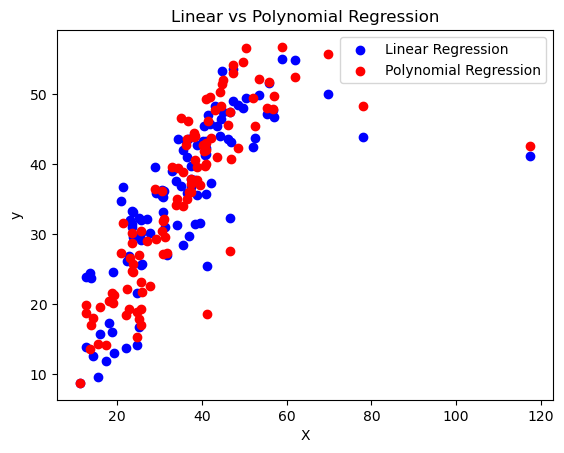

In [41]:
# Plot the results
plt.scatter(y_test, yhat, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Regression')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear vs Polynomial Regression')
plt.savefig('plots/linear_reg_vs_poly_reg.png')
plt.show()